In [1]:
import os
os.chdir('C:\\Users\\JustinMyers\\Documents\\WQU_Group1165')
print(os.getcwd())

C:\Users\JustinMyers\Documents\WQU_Group1165


In [2]:
from functions.funcs import generate_data, agg_stats
from matplotlib import pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np

In [3]:
#Stocks we will be looking at
stocks = {'Apple':'AAPL',
            'Coca-Cola':'KO',
            'J&J':'JNJ',
            'American Express':'AXP',
            'Nike':'NKE',
            'JP Morgan':'JPM',
            'Starbucks':'SBUX',
            'S&P' : 'SPY'}

tickers = ['AAPL','SPY','KO','JNJ','AXP','NKE','JPM','SBUX']

In [4]:
df = generate_data(tickers=tickers,start='2017-01-01',end='2022-12-31',band=2,windows=[5,10,30,60,90],initial=1_000)

Getting data for AAPL
[*********************100%***********************]  1 of 1 completed
Getting data for SPY
[*********************100%***********************]  1 of 1 completed
Getting data for KO
[*********************100%***********************]  1 of 1 completed
Getting data for JNJ
[*********************100%***********************]  1 of 1 completed
Getting data for AXP
[*********************100%***********************]  1 of 1 completed
Getting data for NKE
[*********************100%***********************]  1 of 1 completed
Getting data for JPM
[*********************100%***********************]  1 of 1 completed
Getting data for SBUX
[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,date,ticker,open,close,5_day_ma_close,10_day_ma_close,volume,5_day_ma_volume,10_day_ma_volume,daily_return,...,shares_value_60,portfolio_value_60,90_day_ma_return,90_day_ma_return_std,buy_or_sell_90,buy_or_sell_next_day_90,cash_90,shares_90,shares_value_90,portfolio_value_90
0,2017-01-03,AAPL,28.950001,29.037500,29.037500,29.037500,115127600,115127600.0,115127600.0,0.003018,...,0.0,1000.0,0.003018,NaN,NaN,0,1000.0,0.0,0.0,1000.0
1,2017-01-04,AAPL,28.962500,29.004999,29.021250,29.021250,84472400,99800000.0,99800000.0,0.001466,...,0.0,1000.0,0.002242,0.001097,0.0,0,1000.0,0.0,0.0,1000.0
2,2017-01-05,AAPL,28.980000,29.152500,29.065000,29.065000,88774400,96124800.0,96124800.0,0.005935,...,0.0,1000.0,0.003473,0.002269,0.0,0,1000.0,0.0,0.0,1000.0
3,2017-01-06,AAPL,29.195000,29.477501,29.168125,29.168125,127007600,103845500.0,103845500.0,0.009630,...,0.0,1000.0,0.005012,0.003593,0.0,0,1000.0,0.0,0.0,1000.0
4,2017-01-09,AAPL,29.487499,29.747499,29.284000,29.284000,134247600,109925920.0,109925920.0,0.008779,...,0.0,1000.0,0.005765,0.003538,0.0,0,1000.0,0.0,0.0,1000.0


In [6]:
for col in df.columns:
    print(col)

date
ticker
open
close
5_day_ma_close
10_day_ma_close
volume
5_day_ma_volume
10_day_ma_volume
daily_return
cum_return
5_day_return
10_day_return
daily_price_change
initial
return_flag
5_day_ma_return
5_day_ma_return_std
buy_or_sell_5
buy_or_sell_next_day_5
cash_5
shares_5
shares_value_5
portfolio_value_5
10_day_ma_return
10_day_ma_return_std
buy_or_sell_10
buy_or_sell_next_day_10
cash_10
shares_10
shares_value_10
portfolio_value_10
30_day_ma_return
30_day_ma_return_std
buy_or_sell_30
buy_or_sell_next_day_30
cash_30
shares_30
shares_value_30
portfolio_value_30
60_day_ma_return
60_day_ma_return_std
buy_or_sell_60
buy_or_sell_next_day_60
cash_60
shares_60
shares_value_60
portfolio_value_60
90_day_ma_return
90_day_ma_return_std
buy_or_sell_90
buy_or_sell_next_day_90
cash_90
shares_90
shares_value_90
portfolio_value_90


AAPL


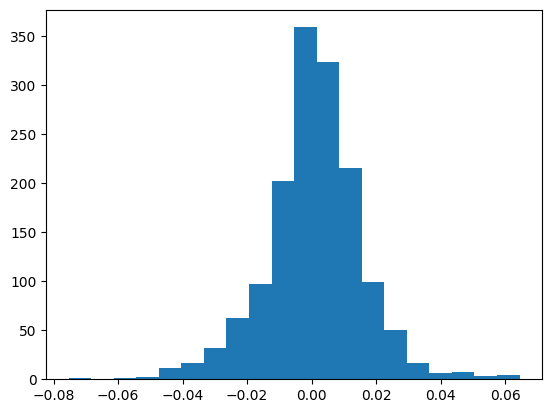

SPY


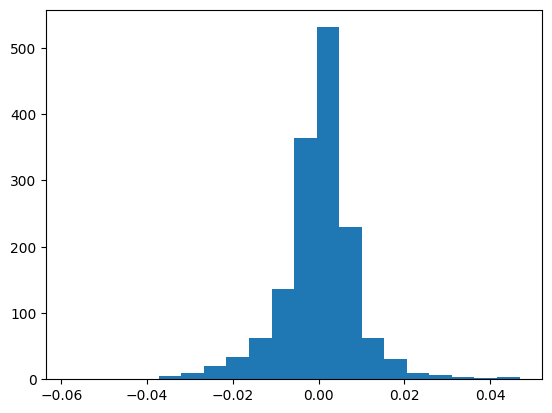

KO


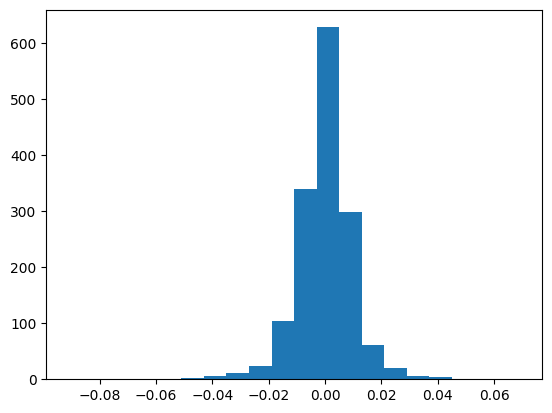

JNJ


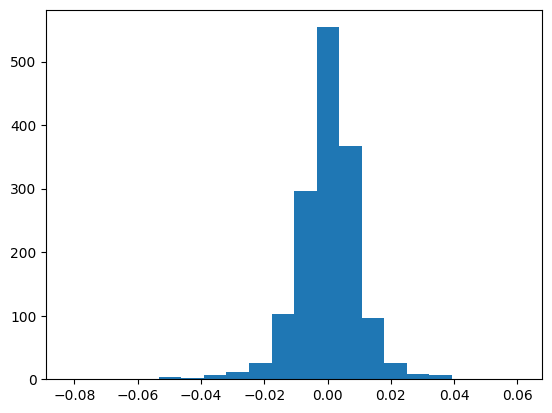

AXP


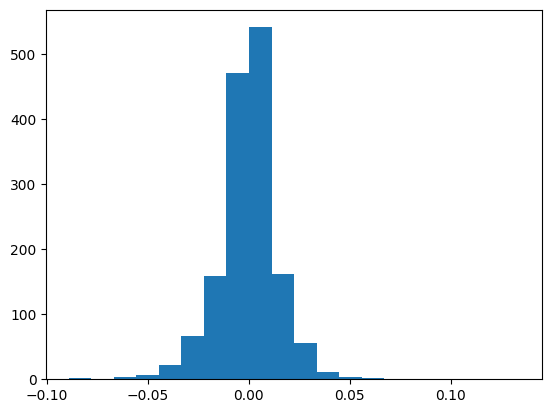

NKE


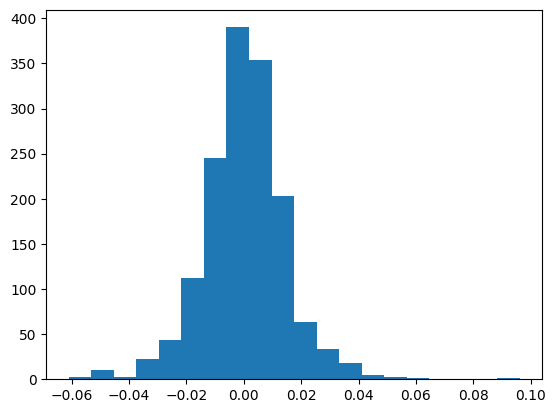

JPM


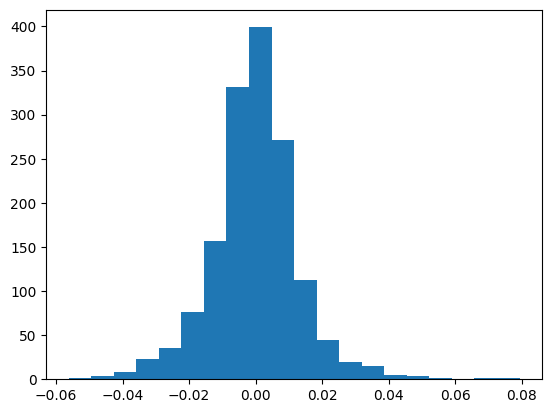

SBUX


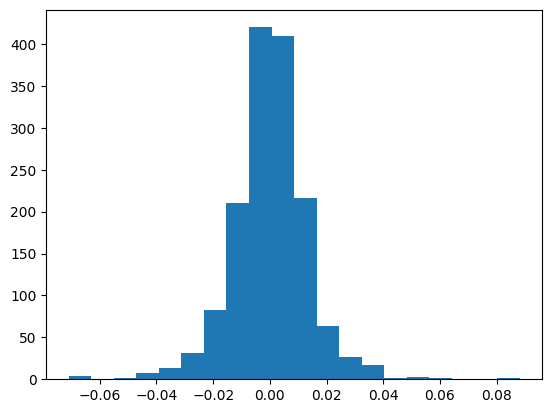

In [7]:
for stock in df['ticker'].unique():
    print(stock)
    plt_df = df[df['ticker']==stock]
    plt.hist(plt_df['daily_return'],bins=20)
    plt.show()

AAPL


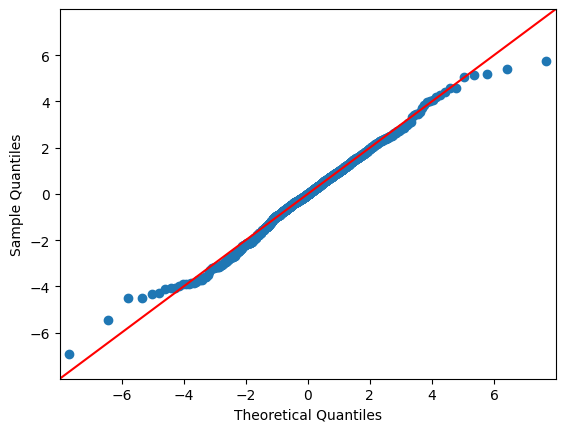

SPY


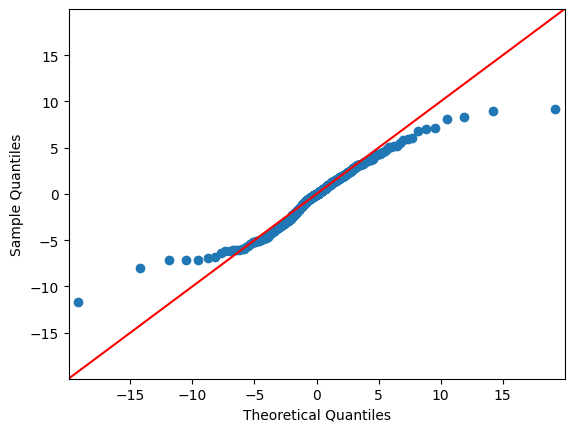

KO


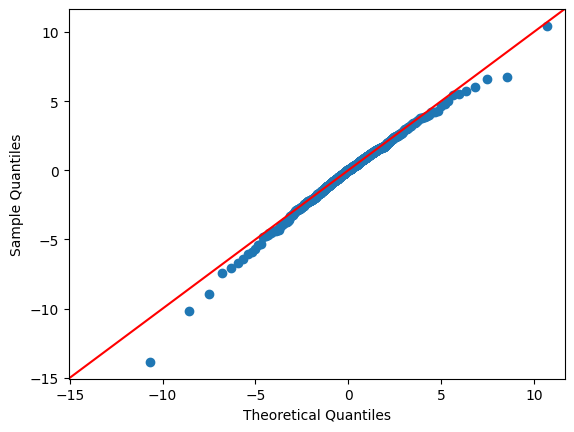

JNJ


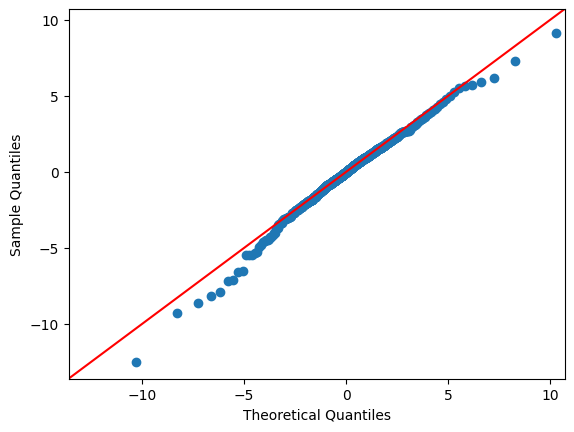

AXP


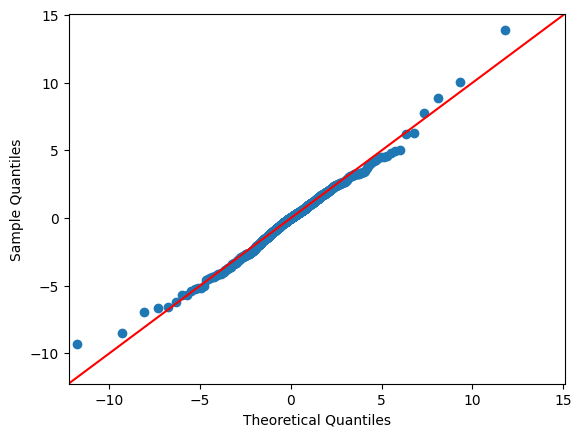

NKE


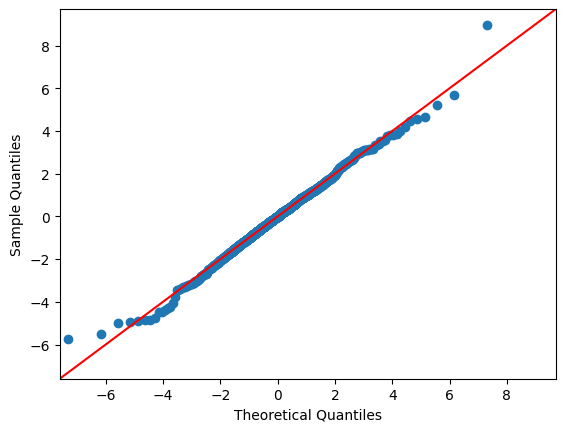

JPM


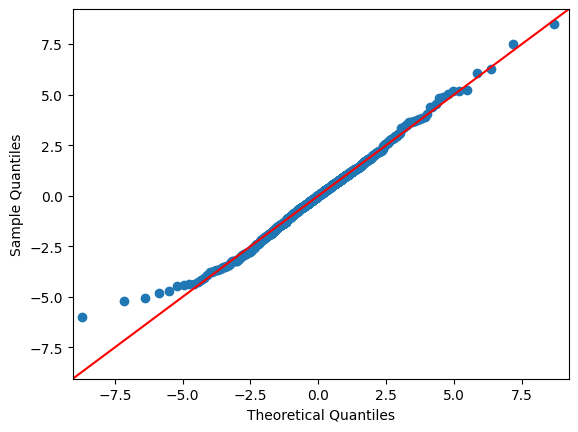

SBUX


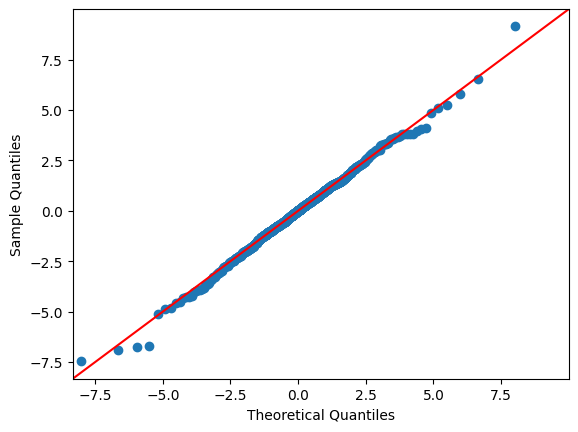

In [8]:
for stock in df['ticker'].unique():
    print(stock)
    plt_df = df[df['ticker']==stock]    
    fig = sm.qqplot(plt_df['daily_return'], stats.t, fit=True, line="45")
    plt.show()

AAPL


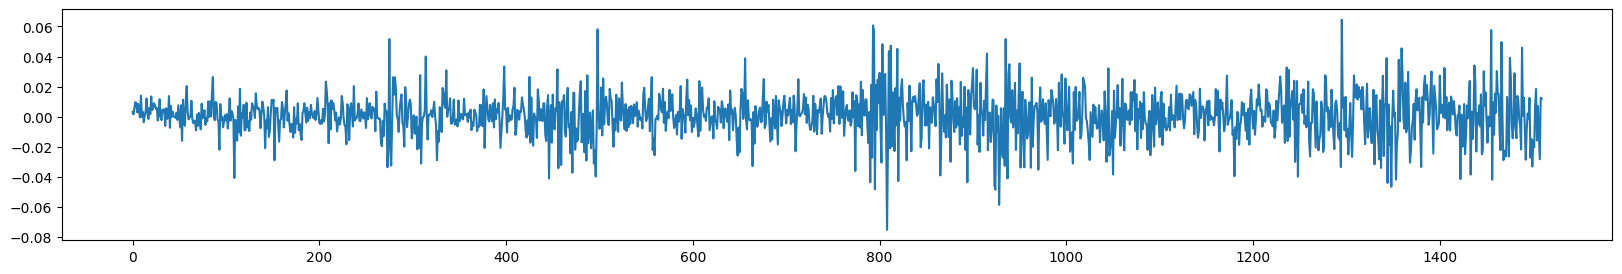

SPY


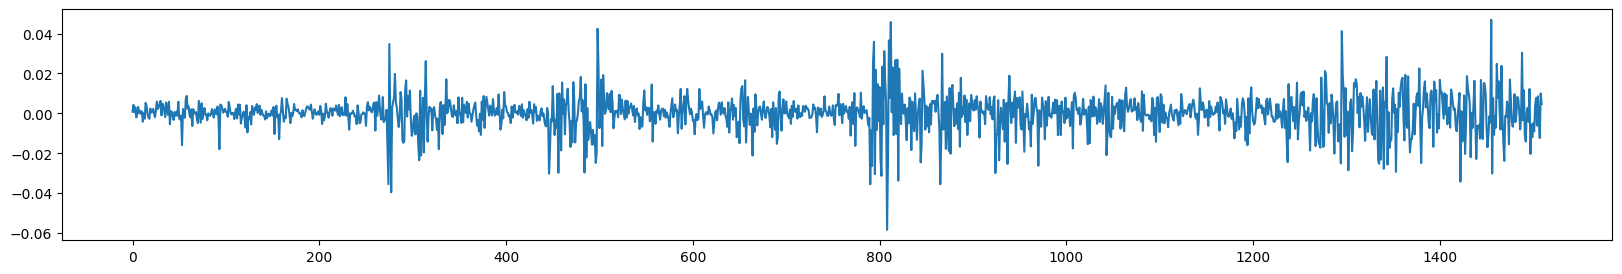

KO


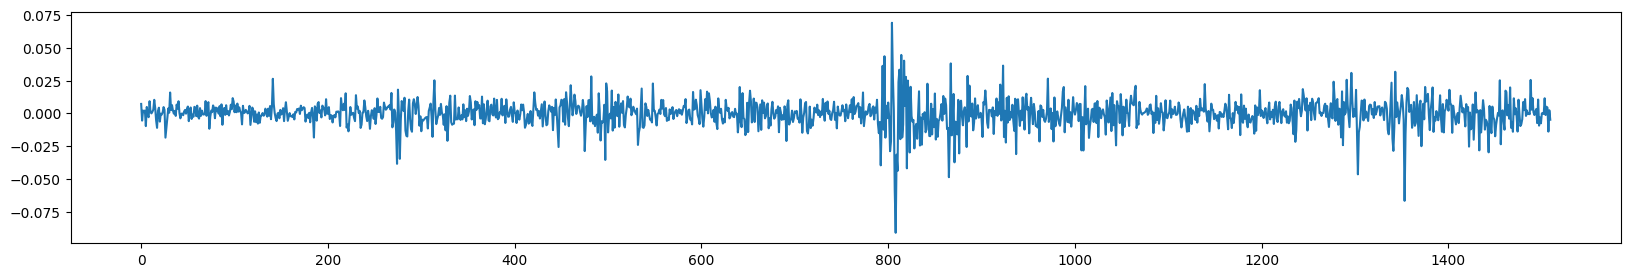

JNJ


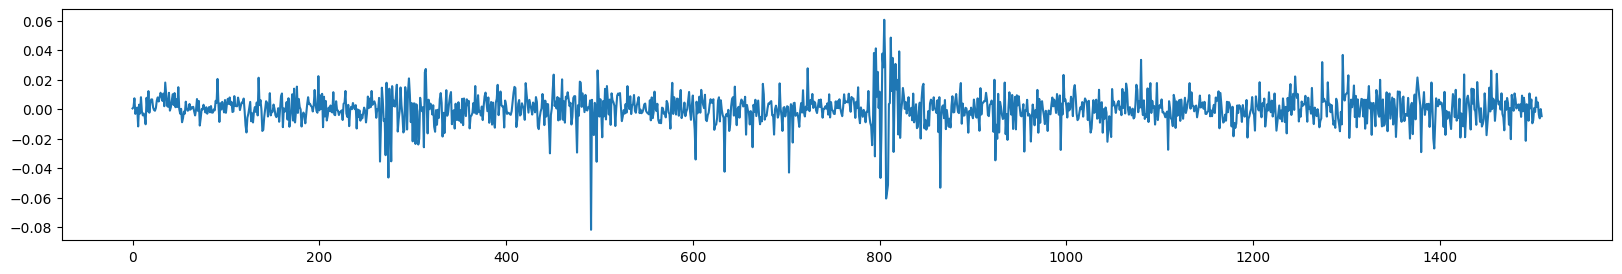

AXP


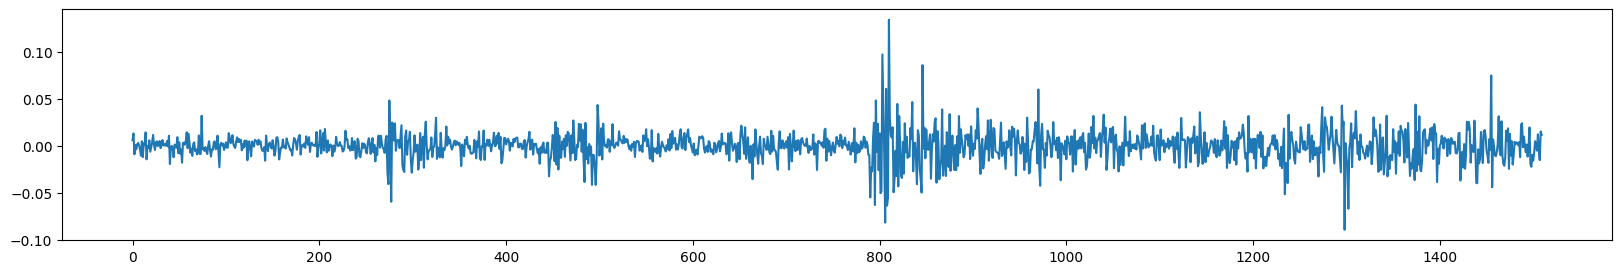

NKE


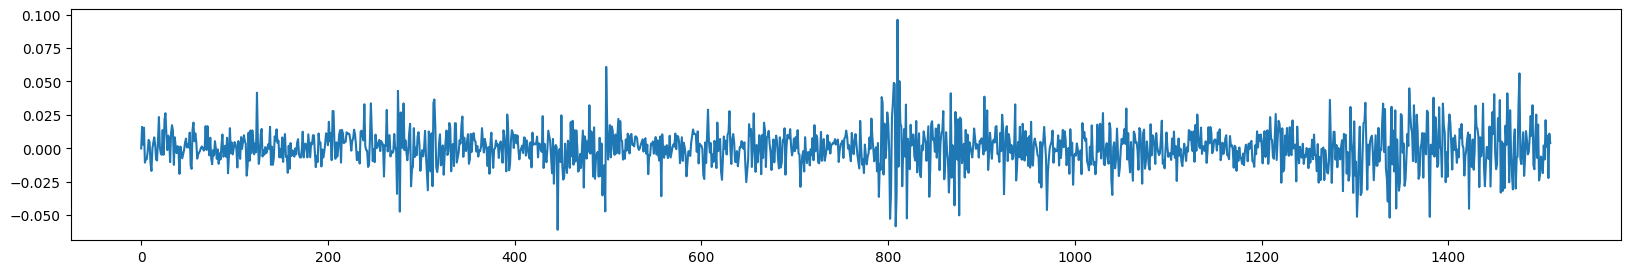

JPM


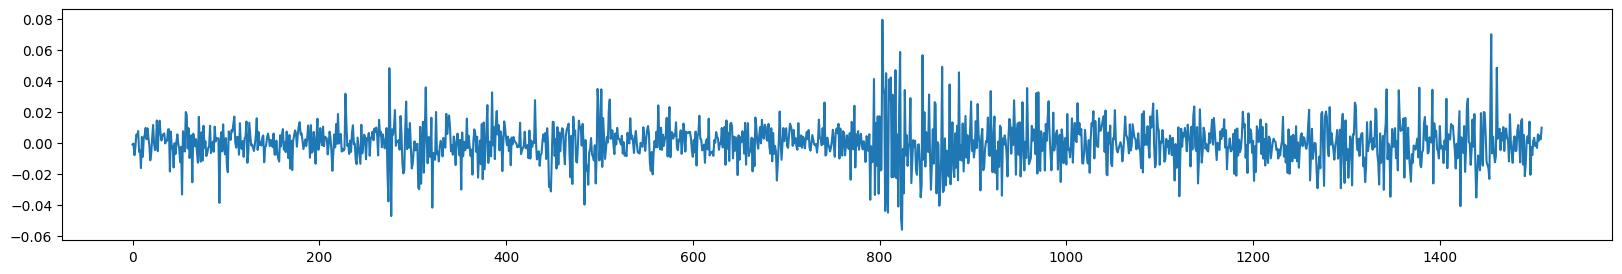

SBUX


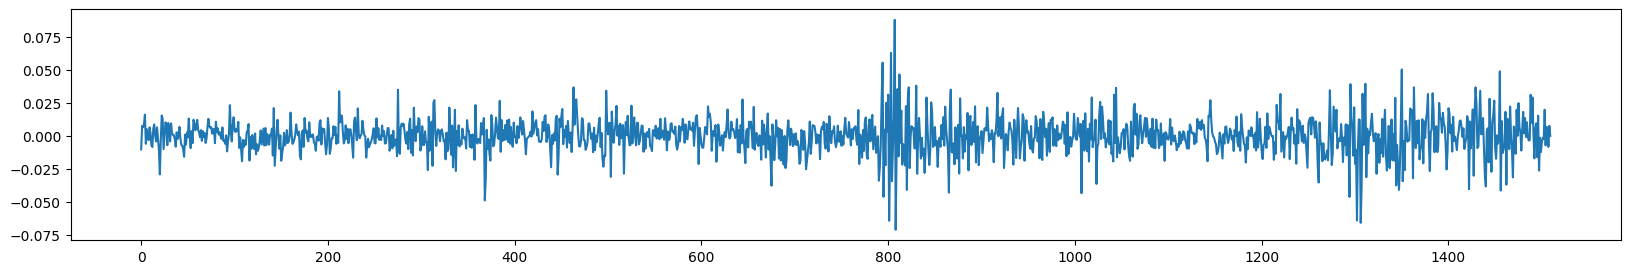

In [9]:
plt.rcParams["figure.figsize"] = (20,3)
for stock in df['ticker'].unique():
    print(stock)
    plt_df = df[df['ticker']==stock] 
    plt.plot(plt_df['daily_return'])
    plt.show()

AAPL


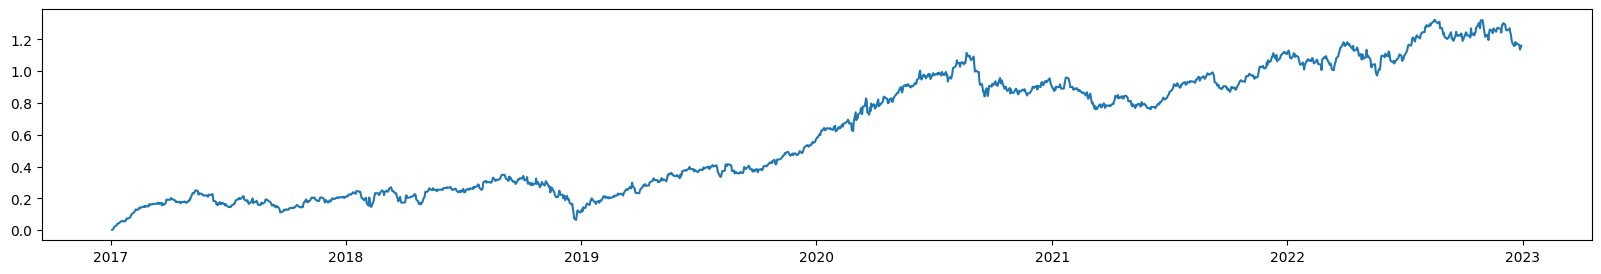

SPY


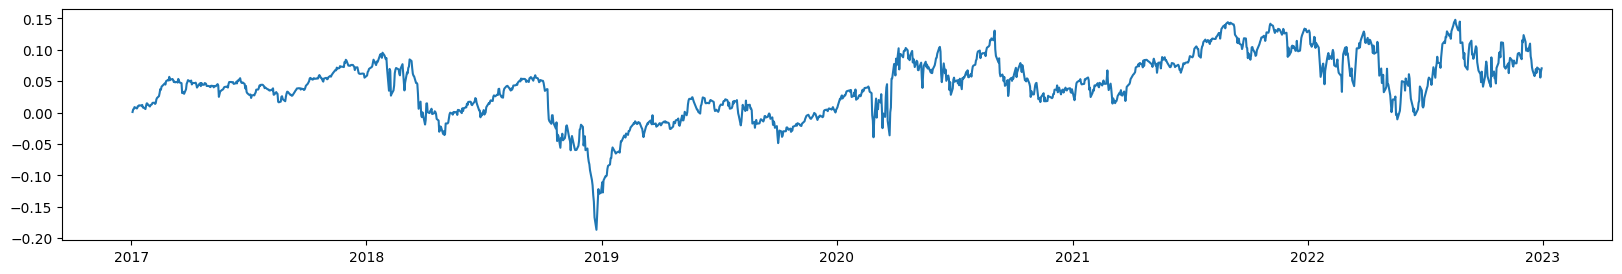

KO


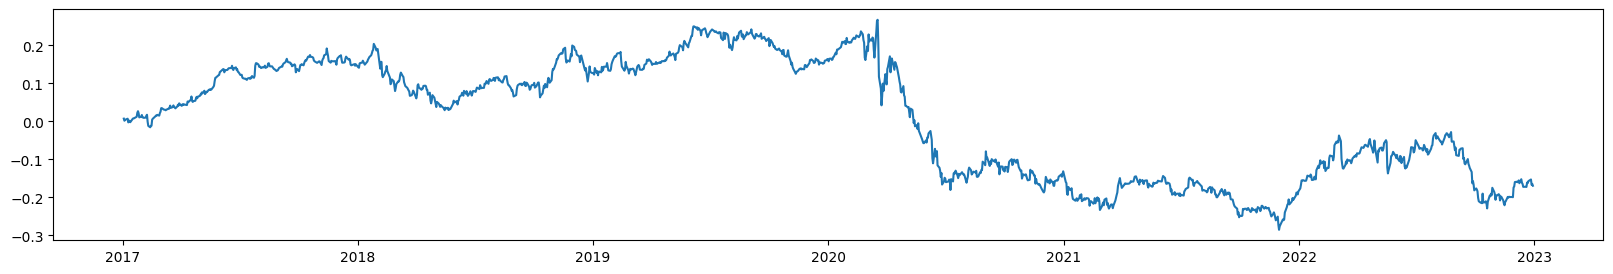

JNJ


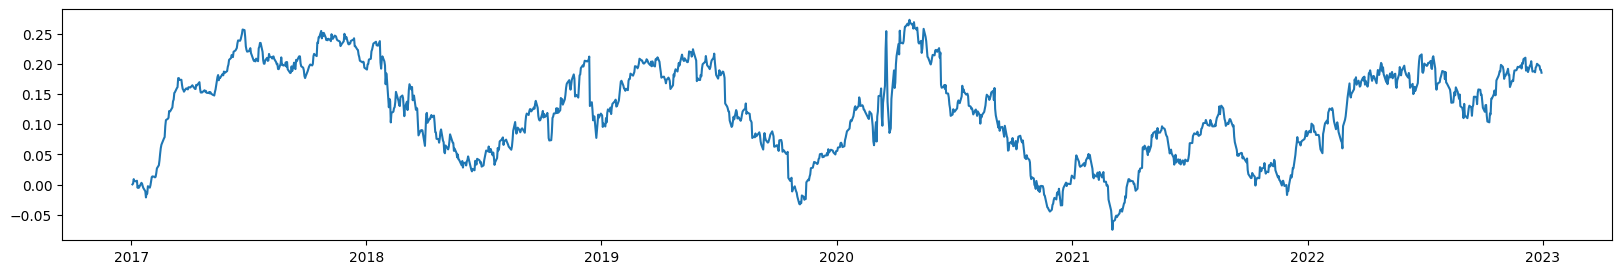

AXP


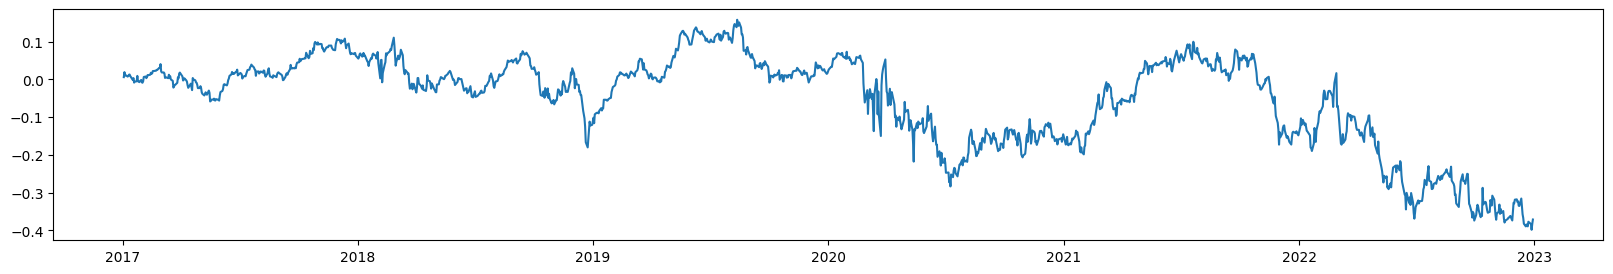

NKE


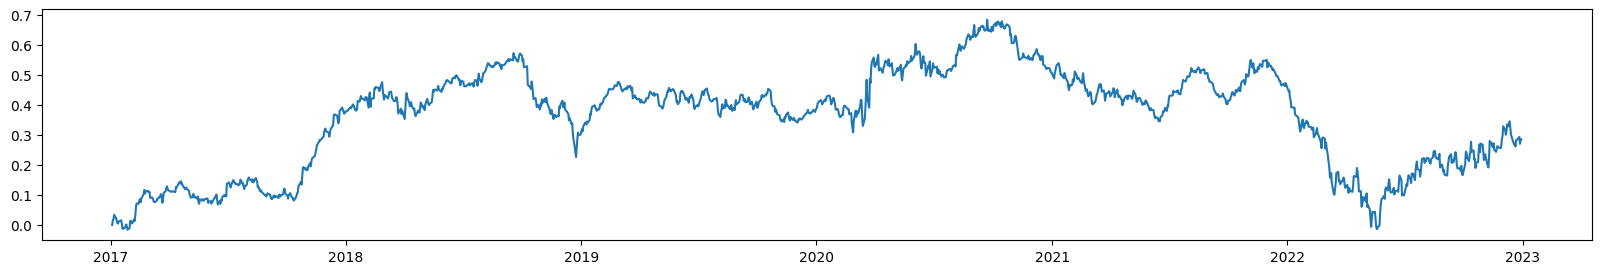

JPM


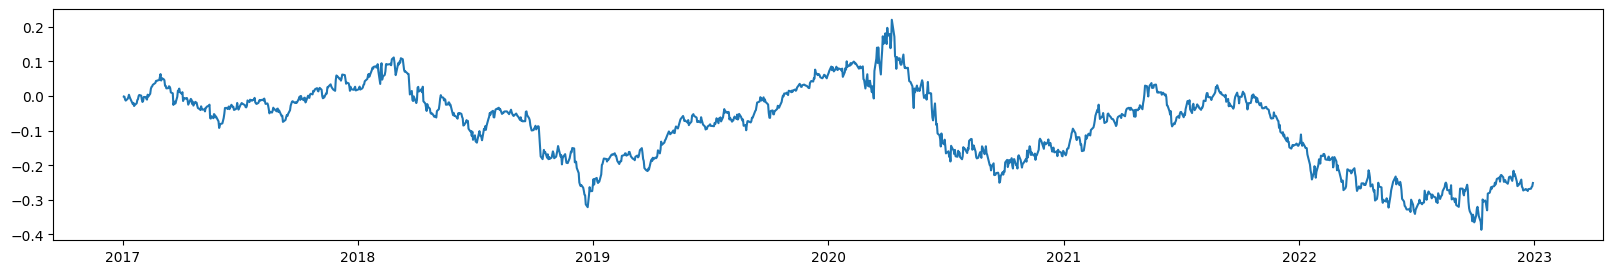

SBUX


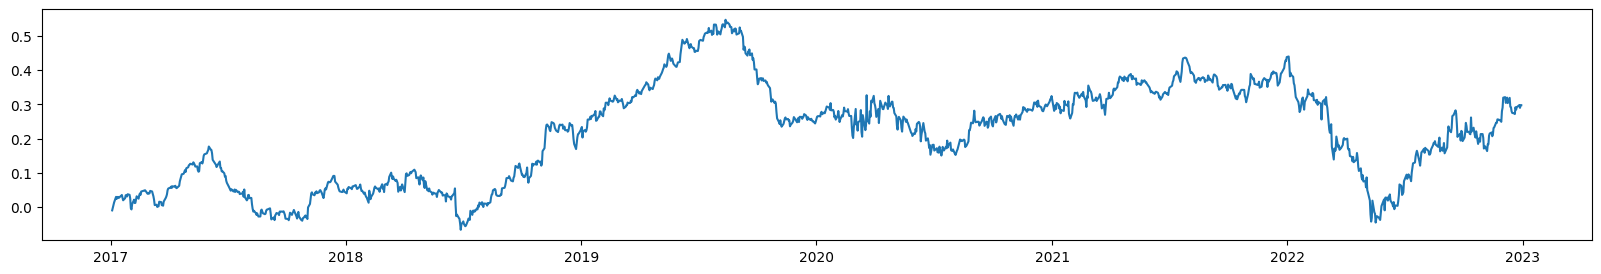

In [10]:
plt.rcParams["figure.figsize"] = (20,3)
for stock in df['ticker'].unique():
    print(stock)
    plt_df = df[df['ticker']==stock] 
    plt.plot(plt_df['date'],plt_df['cum_return'])
    plt.show()

In [11]:
windows = [5,10,30,60,90]
agg_stats(df,windows)

---------------------------------------
return_flag       0     1
buy_or_sell_5            
0.0            5826  6246
---------------------------------------
return_flag            0          1
buy_or_sell_5                      
0.0           -52.883994  54.084919
---------------------------------------
return_flag        0     1
buy_or_sell_10            
-1.0             113   117
 0.0            5631  6032
 1.0              82    97
---------------------------------------
return_flag             0          1
buy_or_sell_10                      
-1.0            -1.208424   1.069835
 0.0           -50.706744  52.144880
 1.0            -0.968827   0.870205
---------------------------------------
return_flag        0     1
buy_or_sell_30            
-1.0             180   188
 0.0            5507  5919
 1.0             139   139
---------------------------------------
return_flag             0          1
buy_or_sell_30                      
-1.0            -2.164554   1.931048
 0.0    

In [12]:
df.groupby(['return_flag']).agg({"volume": [np.mean, np.sum,'count']}).round(2)

volume                    
                    mean           sum count
return_flag                                 
0            32498891.11  189436036300  5829
1            31523049.06  197050579700  6251

AAPL


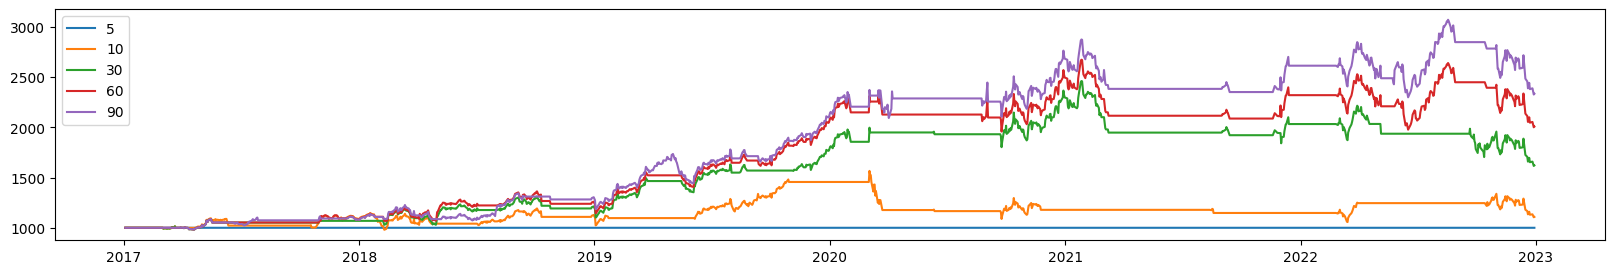

SPY


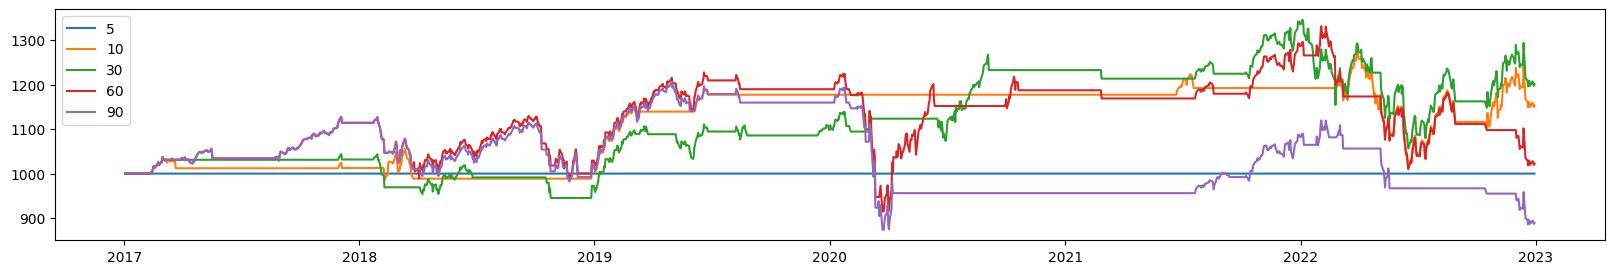

KO


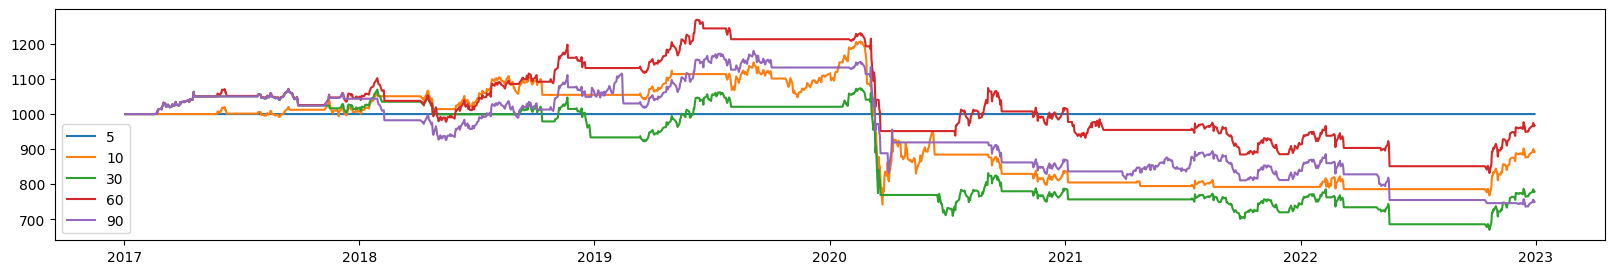

JNJ


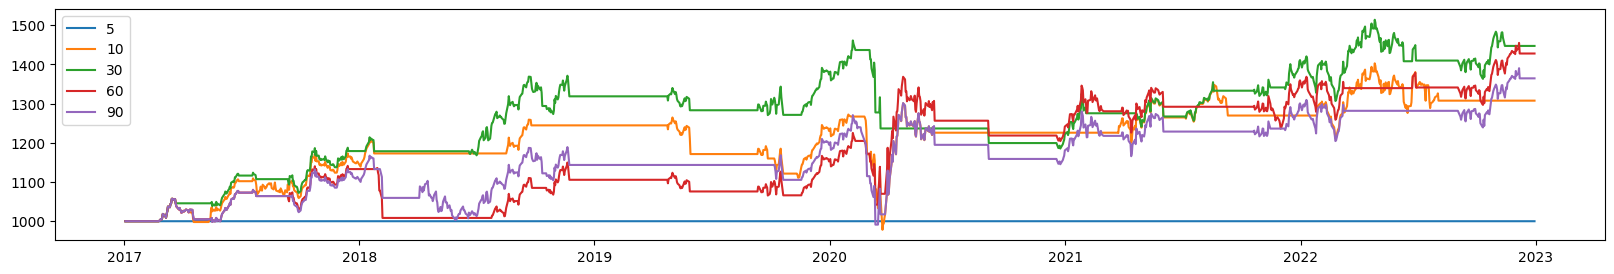

AXP


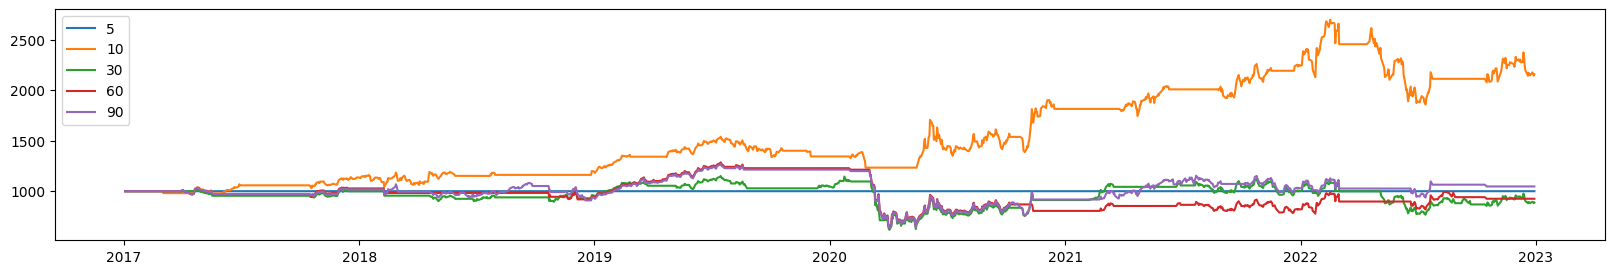

NKE


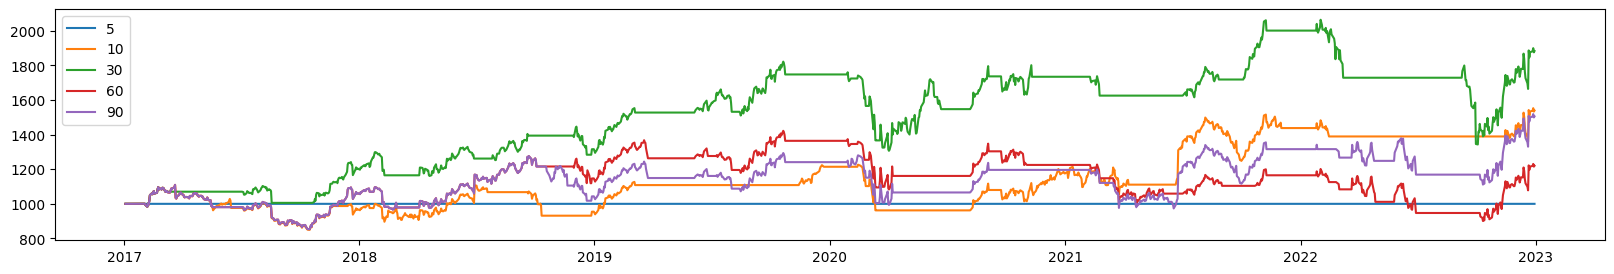

JPM


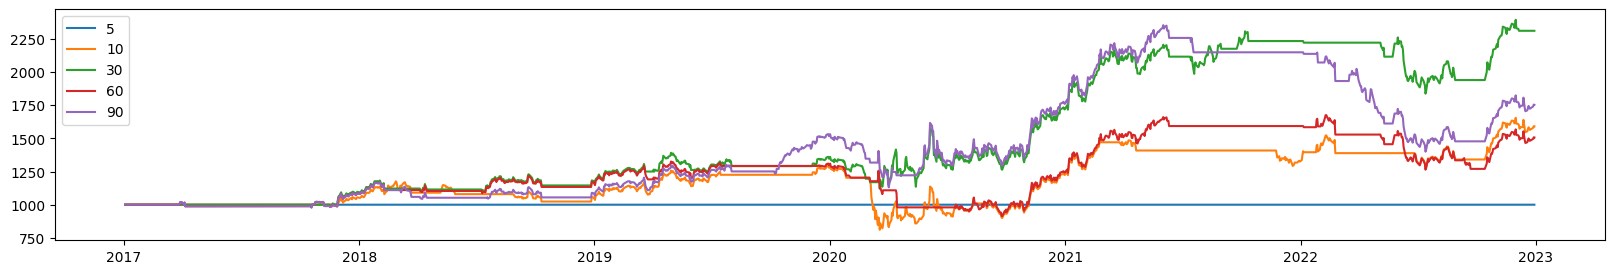

SBUX


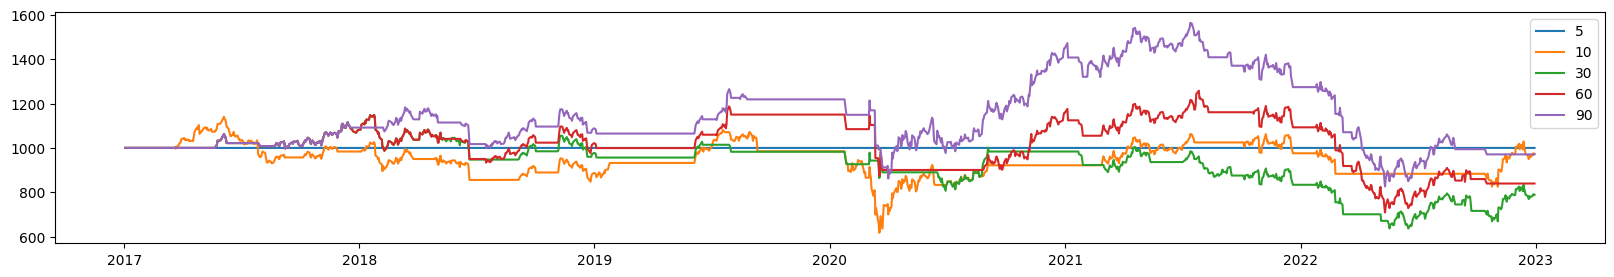

In [14]:
plt.rcParams["figure.figsize"] = (20,3)
for stock in df['ticker'].unique():
    print(stock)
    plt_df = df[df['ticker']==stock] 
    for window in [5,10,30,60,90]:
        plt.plot(plt_df['date'],plt_df[f'portfolio_value_{window}'],label=window)
    plt.legend()
    plt.show()

In [18]:
last_df = df[df['date']==df['date'].max()]D

In [25]:
last_df[['ticker','portfolio_value_5','portfolio_value_10','portfolio_value_30','portfolio_value_60','portfolio_value_90']]

,ticker,portfolio_value_5,portfolio_value_10,portfolio_value_30,portfolio_value_60,portfolio_value_90
1509,AAPL,1000,1108.481320,1621.802686,2008.293549,2335.884652
1509,SPY,1000,1152.795536,1200.492368,1022.297673,889.283238
1509,KO,1000,892.506713,778.811913,966.721071,749.746292
1509,JNJ,1000,1307.378136,1446.889129,1427.558409,1364.218792
1509,AXP,1000,2157.784157,887.392873,925.250591,1046.876383
1509,NKE,1000,1539.395467,1883.201530,1220.031301,1505.485773
1509,JPM,1000,1590.328827,2310.008780,1506.367380,1752.429984
1509,SBUX,1000,973.437519,788.862440,839.407319,970.904075
